# Calculation of melting temperature

In this notebook, we will use interatomic potentials for the calculation of thermodynamic properties such as Helmholtz and Gibbs free energies, which in turn can be used for the calculation of phase diagrams. We will discuss calphy, the tool for automated calculation of free energies, and the methology involved. As a first step, we will calculate the melting temperature of Copper. A brief introduction to the tools.

## pyiron_atomistics

[pyiron_atomistics](https://github.com/pyiron/pyiron_atomistics) provides integrations for atomistics tools enabling seamless cross-code workflows from jupyter notebooks.

## calphy

[Calphy](https://calphy.org) is a Python code for automated calculation of free energies. It enables calculation of Helmholtz and Gibbs free energy for both solid and liquid phases at the given thermodynamic conditions using automated protocols.

This notebook **explores** the finished calculations. If you would like to instead run them, please see notebook [`example_run.ipynb`](example_run.ipynb). 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from pyiron_atomistics import Project

Create a project

In [3]:
pr = Project("melting_temperature")

In [7]:
pr.unpack("pyiron/calculation/save", csv_file_name="pyiron/calculation/export.csv")

In [8]:
pr.job_table()

,id,status,chemicalformula,job,subjob,projectpath,project,timestart,timestop,totalcputime,computer,hamilton,hamversion,parentid,masterid
0,1,finished,None,tm_cu_sol,/tm_cu_sol,/home/jovyan/,melting_temperature/melting_temperature/,2022-07-28 15:05:49.786065,2022-07-28 15:06:33.242462,43.0,pyiron@cmleo26#2,Calphy,0.4,None,None
1,2,finished,None,tm_cu_lqd,/tm_cu_lqd,/home/jovyan/,melting_temperature/melting_temperature/,2022-07-28 15:06:33.438176,2022-07-28 15:07:34.701286,61.0,pyiron@cmleo26#2,Calphy,0.4,None,None


In [17]:
sol = pr.load("tm_cu_sol")
lqd = pr.load("tm_cu_lqd")

The EAM potential we will use is : [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

Now we look at the results

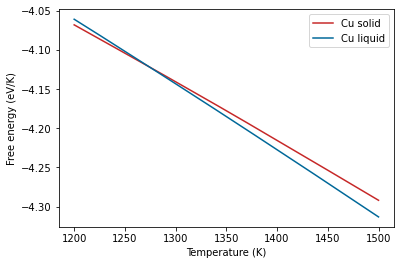

In [18]:
plt.plot(sol.output.temperature, sol.output.energy_free,
        label="Cu solid", color='#C62828')
plt.plot(lqd.output.temperature, lqd.output.energy_free,
        label="Cu liquid", color='#006899')
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend();

The melting temperature is defined as the temperature at which the free energy difference between the solid and liquid phases is zero. We can also plot the free energy difference directly.

In [19]:
fediff = sol.output.energy_free - lqd.output.energy_free

Find where the value is zero and get the corresponding temperature

In [20]:
arg = np.argsort(np.abs(fediff))[0]
tm = sol.output.temperature[arg]
tm

1274.1558717349756

The calculated melting temperature is shown above.

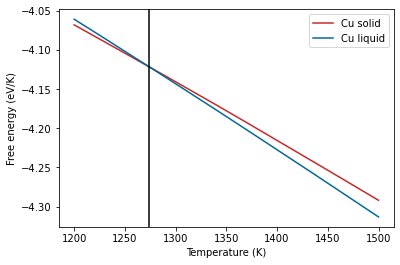

In [21]:
plt.plot(sol.output.temperature, sol.output.energy_free,
        label="Cu solid", color='#C62828')
plt.plot(lqd.output.temperature, lqd.output.energy_free,
        label="Cu liquid", color='#006899')
plt.axvline(tm, color="black")
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend();

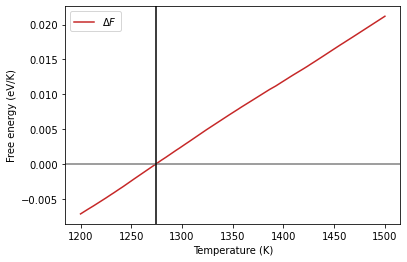

In [22]:
plt.plot(sol.output.temperature, fediff,
        label=r"$\Delta F$", color='#C62828')
plt.axhline(0, color="gray")
plt.axvline(tm, color="black")
plt.xlabel("Temperature (K)")
plt.ylabel("Free energy (eV/K)")
plt.legend();